In [1]:
from Network import PINN
from Physics import *
from Physics import NVS

In [2]:
model0 = PINN(width=20, length = 8, is_steady=True)

## Define Physics

example of 1 iteration

In [3]:
nonslip_x_above = Conditions.nonslip_x(range_x=[0,1], y=1, range_t=None, num_points=10)
nonslip_x_below = Conditions.define_conditions(range_x=[0,1], range_y=0, range_t=None, num_points=10, target_quantity_dict = {'u':0.0, 'v':0.0, 'p_x': 0.0})
inlet = Conditions.inlet_y_uniform(x=0, range_y=[0,1], range_t=None, num_points=10, u_value=5.0)
outlet = Conditions.outlet_y(x=1, range_y=[0,1], range_t=None, num_points=10, pressure_value=0.0)

In [4]:
bc_loss = Conditions.loss_calc([inlet], model0)
print(bc_loss)

tensor(8.0730, grad_fn=<AddBackward0>)


In [5]:
pde_loss = NVS.loss_cal(model=model0, range_x=[0,1], range_y=[0,1], num_points=1000)
print(pde_loss)

tensor(9.9605e-07, grad_fn=<MeanBackward0>)


In [10]:
x = torch.tensor([1, 2, 3, 4])

x_row = x[None, :]   # shape: (1, 4)
x_col = x[:, None]   # shape: (4, 1)

print(x_col)
print(x.shape[0])

tensor([[1],
        [2],
        [3],
        [4]])
4


In [4]:
import torch

n_points = 100
range_x = [0, 2]
range_y = [0, 1]

points = torch.empty(n_points, 2)
points[:, 0].uniform_(range_x[0] + 1e-6, range_x[1] - 1e-6)  # x values
points[:, 1].uniform_(range_y[0] + 1e-6, range_y[1] - 1e-6)  # y values

tensor([0.1014, 0.9477, 0.5081, 0.7917, 0.1546, 0.6510, 0.1556, 0.6977, 0.1370,
        0.3171, 0.2542, 0.0456, 0.0564, 0.4336, 0.7402, 0.5924, 0.0526, 0.5735,
        0.8615, 0.1545, 0.0585, 0.2663, 0.7631, 0.1955, 0.1599, 0.7475, 0.4489,
        0.2532, 0.9926, 0.0700, 0.3307, 0.4805, 0.7247, 0.6733, 0.6948, 0.4094,
        0.0099, 0.3830, 0.9427, 0.0157, 0.4664, 0.7882, 0.6523, 0.2972, 0.9634,
        0.6409, 0.1705, 0.5554, 0.8220, 0.5620, 0.4384, 0.6763, 0.6243, 0.4770,
        0.8288, 0.8223, 0.5611, 0.7655, 0.6002, 0.6168, 0.2746, 0.1957, 0.0814,
        0.2992, 0.1345, 0.4871, 0.5775, 0.3829, 0.0940, 0.8340, 0.2721, 0.9225,
        0.4069, 0.6004, 0.3391, 0.9547, 0.6326, 0.2691, 0.7500, 0.3603, 0.6113,
        0.0388, 0.3391, 0.2905, 0.2802, 0.6907, 0.7168, 0.8637, 0.5891, 0.6851,
        0.3430, 0.7127, 0.5450, 0.8119, 0.1453, 0.2222, 0.6589, 0.9623, 0.2796,
        0.9352])

torch.Size([27508])


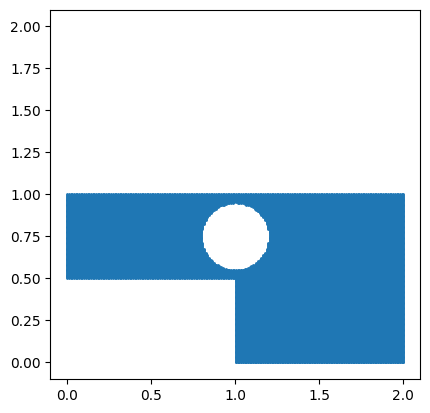

In [2]:
import matplotlib.pyplot as plt
from PointSampling import Bound, PhysicsBound
import torch

def func1(x):
    return 1
bound1 = Bound([0,2], func1, True)
def func2(x):
    return 0.5
bound2 = Bound([0,0.5], func2, False)
def func3(x):
    return 0
bound3 = Bound([0,2], func3, False)

def func4(y):
    return 0
bound4 = Bound([0.5,1], func4, False, ref_axis='y')
def func5(y):
    return 2
bound5 = Bound([0,1], func5, True, ref_axis='y')
def func6(y):
    return 1
bound6 = Bound([0,0.5], func6, False, ref_axis='y')
def func7(x):
    return torch.sqrt(0.2**2-(x-1)**2)+0.75
bound7 = Bound([0.8,1.2], func7, False,'x',False)
def func8(x):
    return -torch.sqrt(0.2**2-(x-1)**2)+0.75
bound8 = Bound([0.8,1.2], func8, True,'x',False)

X, Y = Bound.sampling_area([bound1, bound2, bound3, bound4, bound5, bound6, bound7, bound8], 200, [0,2], [0,1])
print(X.shape)

plt.figure()
plt.scatter(X,Y,s=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

torch.Size([37508])


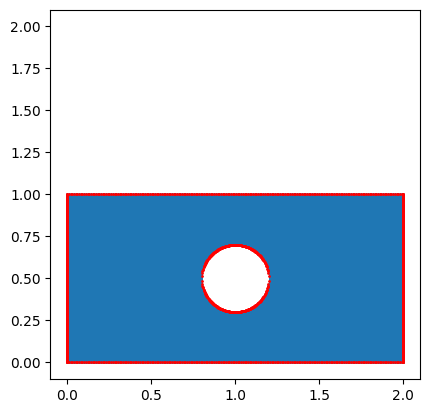

In [28]:
import matplotlib.pyplot as plt
from PointSampling import Bound, PhysicsBound
import torch

bound_list = []
def func1(x):
    return 1*torch.ones_like(x)
bound_list.append(Bound([0,2], func1, True))
def func2(x):
    return 0*torch.ones_like(x)
bound_list.append(Bound([0,2], func2, False))

def func3(y):
    return 0*torch.ones_like(y)
bound_list.append(Bound([0,1], func3, False, ref_axis='y'))
def func4(y):
    return 2*torch.ones_like(y)
bound_list.append(Bound([0,1], func4, True, ref_axis='y'))

def func5(x):
    return torch.sqrt(0.2**2-(x-1)**2)+0.5
bound_list.append(Bound([0.79,1.21], func5, False,'x',False))
def func6(x):
    return -torch.sqrt(0.2**2-(x-1)**2)+0.5
bound_list.append(Bound([0.79,1.21], func6, True,'x',False))

X, Y = Bound.sampling_area(bound_list, 200, [0,2], [0,1])
print(X.shape)

plt.figure()
plt.scatter(X,Y,s=1)
for bound in bound_list:
    x,y = bound.sampling_line(200)
    plt.scatter(x,y,s=1, color='red')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()